# On the Dynamics of Small Continuous-Time Recurrent Neural Networks
This notebook demonstrates a variety dynamical systems phenomena, like fixed-point attractors, limit cycles, and strange attractors. Many of these parameters are taken from:
> Beer, R. D. (1995). On the dynamics of small continuous-time recurrent neural networks. Adaptive Behavior, 3(4), 469-509.

## Imports

In [1]:
import jax
import jax.numpy as jnp
from jax import random
from flax import linen as nn

from ctrnn_jax.model import SimpleCTRNNCell

from ctrnn_jax.initializers import (
set_weights_and_baises,
index_init,
)

from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Fixed-point attractors

In [2]:
def switch_model(init_const, inputs, W, b):
    ctrnn = nn.RNN(
        SimpleCTRNNCell(
            hidden_features=1, 
            dt=0.01,
            carry_init=nn.initializers.constant(init_const),
        ),
    )
    
    params = ctrnn.init(random.PRNGKey(0), inputs)
    params = set_weights_and_baises(params, W, b)
    
    states = jnp.squeeze(ctrnn.apply(params, inputs))
    return states

In [3]:
time = 500
inputs = jnp.zeros((1, time, 1))
W = jnp.float32(8) * jnp.ones((1, 1))
b = jnp.float32(-4) * jnp.ones(1)

switch_states = jnp.zeros((5, time))

In [4]:
for idx, init_const in tqdm(enumerate([0.00, 0.25, 0.50, 0.75, 1.00])):

    states = switch_model(
        init_const,
        inputs,
        W,
        b,
    )
    switch_states = switch_states.at[idx].set(states)

5it [00:00, 11.33it/s]


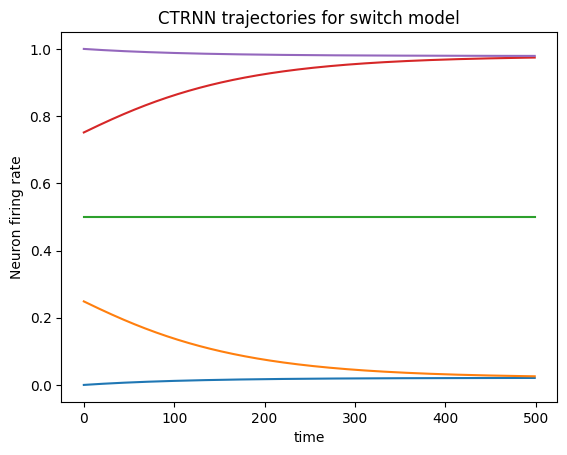

In [5]:
fig, ax = plt.subplots()
ax.plot(switch_states[0,:],)
ax.plot(switch_states[1,:],)
ax.plot(switch_states[2,:],)
ax.plot(switch_states[3,:],)
ax.plot(switch_states[4,:],)
ax.set_xlabel('time')
ax.set_ylabel('Neuron firing rate')
ax.set_title('CTRNN trajectories for switch model')
plt.show()

## Limit cycle

In [6]:
def limit_cycle_model(init_const, inputs, W, b):
    ctrnn = nn.RNN(
        SimpleCTRNNCell(
            hidden_features=2, 
            dt=0.1,
            carry_init=nn.initializers.constant(init_const),
        ),
    )
    
    params = ctrnn.init(random.PRNGKey(0), inputs)
    params = set_weights_and_baises(params, W, b)
    
    states = jnp.squeeze(ctrnn.apply(params, inputs))
    return states

In [7]:
time = 500
inputs = jnp.zeros((1, time, 2))
W = jnp.array([[4.5, -1], [1, 4.5]])
b = jnp.array([-2.75, -1.75])

limit_cycle_state = jnp.zeros((5, time, 2))

In [8]:
for idx, init_const in tqdm(enumerate([0.0, 0.4, 0.5, 0.6, 1.0])):

    states = limit_cycle_model(
        init_const,
        inputs,
        W,
        b,
    )
    limit_cycle_state = limit_cycle_state.at[idx].set(states)

5it [00:00, 10.62it/s]


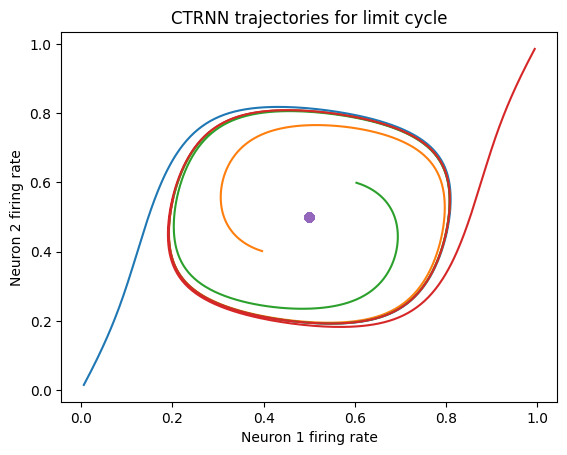

In [9]:
fig, ax = plt.subplots()
ax.plot(limit_cycle_state[0,:,0], limit_cycle_state[0,:,1])
ax.plot(limit_cycle_state[1,:,0], limit_cycle_state[1,:,1])
ax.scatter(limit_cycle_state[2,:,0], limit_cycle_state[2,:,1], c='tab:purple')
ax.plot(limit_cycle_state[3,:,0], limit_cycle_state[3,:,1])
ax.plot(limit_cycle_state[4,:,0], limit_cycle_state[4,:,1])
ax.set_xlabel('Neuron 1 firing rate')
ax.set_ylabel('Neuron 2 firing rate')
ax.set_title('CTRNN trajectories for limit cycle')
plt.show()

## Strange attractor

In [10]:
def strange_attractor_model(init_const, inputs, W, b):
    ctrnn = nn.RNN(
        SimpleCTRNNCell(
            hidden_features=3, 
            dt=0.1,
            carry_init=nn.initializers.constant(init_const),
            tau_init=index_init((0,1,), jnp.float32(2.5)),
        ),
    )
    
    params = ctrnn.init(random.PRNGKey(0), inputs)
    params = set_weights_and_baises(params, W, b)
    
    states = jnp.squeeze(ctrnn.apply(params, inputs))
    return states

In [11]:
time = 5000
inputs = jnp.zeros((1, time, 3))
W = jnp.array([[5.422, -0.24, 0.535], 
               [-0.018, 4.59, -2.25],
               [2.750, 1.210, 3.885]])
b = jnp.array([-4.108, -2.787, -1.114])

strange_attractor_state = jnp.zeros((3, time, 3))

In [12]:
for idx, init_const in tqdm(enumerate([0.45, 0.50, 0.55])):

    states = strange_attractor_model(
        init_const,
        inputs,
        W,
        b,
    )
    strange_attractor_state = strange_attractor_state.at[idx].set(states)

3it [00:00,  7.90it/s]


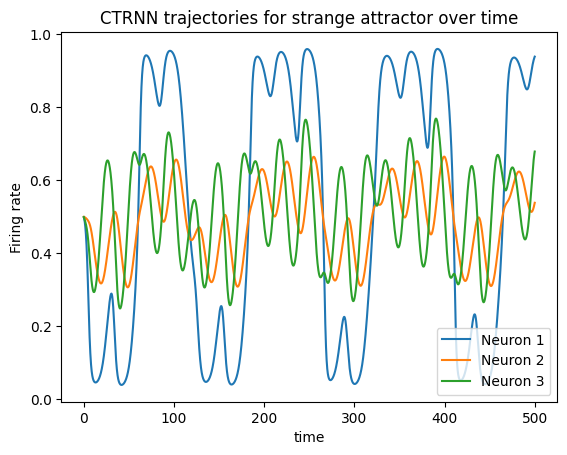

In [13]:
fig, ax = plt.subplots()
ax.plot(0.1*jnp.arange(time), strange_attractor_state[1,:,0], label='Neuron 1')
ax.plot(0.1*jnp.arange(time), strange_attractor_state[1,:,1], label='Neuron 2')
ax.plot(0.1*jnp.arange(time), strange_attractor_state[1,:,2], label='Neuron 3')
ax.set_title('CTRNN trajectories for strange attractor over time')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('Firing rate')
plt.show()

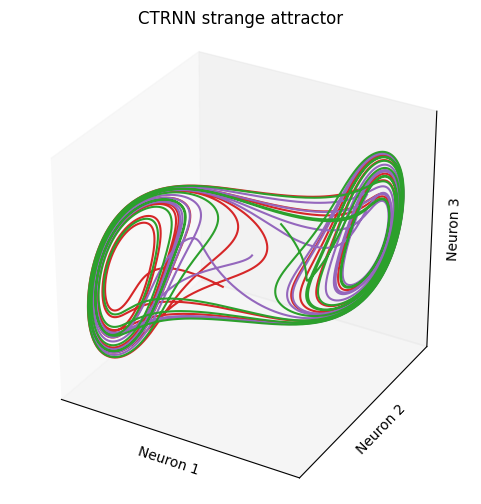

In [14]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    strange_attractor_state[0, :, 0], 
    strange_attractor_state[0, :, 1], 
    strange_attractor_state[0, :, 2], 
    c='tab:red'
)
ax.plot(
    strange_attractor_state[1, :, 0], 
    strange_attractor_state[1, :, 1], 
    strange_attractor_state[1, :, 2], 
    c='tab:purple'
)
ax.plot(
    strange_attractor_state[2, :, 0], 
    strange_attractor_state[2, :, 1], 
    strange_attractor_state[2, :, 2], 
    c='tab:green'
)

ax.set_xlabel('Neuron 1', labelpad=-10)
ax.set_ylabel('Neuron 2', labelpad=-10)
ax.set_zlabel('Neuron 3', labelpad=-10)
ax.set_title('CTRNN strange attractor')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_box_aspect([1, 1, 1])
plt.show()